In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
ads_data = pd.read_csv ("C:/Users/yana2/Рабочий стол/ads_data.csv",  sep=';')

In [25]:
ads_data.drop(columns=['Unnamed: 0'],inplace = True)


In [26]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,click,05.04.2019,CPM,0,5681,23456,android,190.00,125560,793
1,111941,1554135866,click,05.04.2019,CPM,0,111793,111941,ios,215.20,32277,1041
2,111941,1554135866,view,05.04.2019,CPM,0,111793,111941,ios,215.20,32277,41
3,42987,1554135866,view,02.04.2019,CPM,0,28541,42985,ios,199.10,80160,898
4,23456,1554135866,view,05.04.2019,CPM,0,5681,23456,web,190.00,125560,29
...,...,...,...,...,...,...,...,...,...,...,...,...
96,5307467,1554135824,view,06.04.2019,CPM,0,722,42985,web,196.24,80160,673
97,12546127,1553545686,view,02.04.2019,CPM,0,111818,23456,android,215.21,125560,680
98,6623587,1553486668,view,03.04.2019,CPM,0,722,23456,ios,199.20,53185,687
99,7281647,1554076848,view,02.04.2019,CPM,0,110374,111941,web,190.19,125560,694


In [27]:
ads_data [ 'full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [28]:
ads_data [ 'date'] = pd.to_datetime(ads_data.date)

In [29]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,click,2019-05-04,CPM,0,5681,23456,android,190.00,125560,793,2019-04-01 00:00:48
1,111941,1554135866,click,2019-05-04,CPM,0,111793,111941,ios,215.20,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-05-04,CPM,0,111793,111941,ios,215.20,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-02-04,CPM,0,28541,42985,ios,199.10,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-05-04,CPM,0,5681,23456,web,190.00,125560,29,2019-04-01 16:24:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5307467,1554135824,view,2019-06-04,CPM,0,722,42985,web,196.24,80160,673,2019-04-01 16:23:44
97,12546127,1553545686,view,2019-02-04,CPM,0,111818,23456,android,215.21,125560,680,2019-03-25 20:28:06
98,6623587,1553486668,view,2019-03-04,CPM,0,722,23456,ios,199.20,53185,687,2019-03-25 04:04:28
99,7281647,1554076848,view,2019-02-04,CPM,0,110374,111941,web,190.19,125560,694,2019-04-01 00:00:48


In [9]:
#Получить статистику по дням

<AxesSubplot:xlabel='date'>

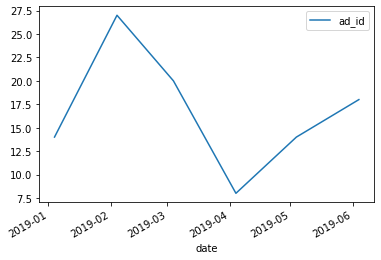

In [30]:
ads_data.groupby('date') \
    .agg({'ad_id':'count'}).plot()

In [34]:
ads_data.groupby(['date','event'],as_index=False) \
        .agg({'ad_id':'count'}) 
        
      

,date,event,ad_id
0,2019-01-04,click,8
1,2019-01-04,view,6
2,2019-02-04,click,13
3,2019-02-04,view,14
4,2019-03-04,click,9
5,2019-03-04,view,11
6,2019-04-04,click,3
7,2019-04-04,view,5
8,2019-05-04,click,7
9,2019-05-04,view,7


In [35]:
ads_data.groupby(['date','event'],as_index=False) \
        .agg({'ad_id':'count'})\
        .pivot_table(index='date',columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-01-04,8,6
1,2019-02-04,13,14
2,2019-03-04,9,11
3,2019-04-04,3,5
4,2019-05-04,7,7
5,2019-06-04,9,9


In [12]:
#справка
??pd.pivot

In [444]:
#число уникальных объявлений и компаний по дням campaign_union_id

In [31]:
ads_data.groupby(['date'],as_index=False) \
        .agg({'ad_id':'nunique', 'campaign_union_id':'nunique'})

,date,ad_id,campaign_union_id
0,2019-01-04,12,3
1,2019-02-04,17,3
2,2019-03-04,17,3
3,2019-04-04,8,3
4,2019-05-04,10,3
5,2019-06-04,12,3


In [446]:
#разобраться почему произошел скачок 2019-02-04? 
Каких событий стало больше? у всех объявлений или только у некоторых?

Object `некоторых` not found.


In [447]:
ads_data[ads_data.date=='2019-02-04'] \
    .groupby('ad_id') \
    .agg({'campaign_union_id':'count'}) \
    .sort_values('campaign_union_id',ascending=False) \
    .head()

,campaign_union_id
ad_id,
12546127,5
1182610,3
42987,2
615073,2
8597767,2


In [448]:
ad_id = 12546127

In [449]:
ads_data.query('ad_id==@ad_id') \
    .groupby ('date') \
    .agg ({'campaign_union_id':'count'})

,campaign_union_id
date,
2019-02-04,5
2019-05-04,1


In [450]:
ads_data.query('ad_id==@ad_id').head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
46,12546127,1553840776,click,2019-02-04,CPM,0,111818,42985,web,196.14,80160,2328,2019-03-29 06:26:16
53,12546127,1554430956,view,2019-02-04,CPM,0,111818,42985,ios,199.11,15277,3329,2019-04-05 02:22:36
74,12546127,1554135794,click,2019-05-04,CPM,0,111818,42985,web,190.14,80160,519,2019-04-01 16:23:14
91,12546127,1554135854,view,2019-02-04,CPM,0,223274,42985,web,196.23,124560,638,2019-04-01 16:24:14
97,12546127,1553545686,view,2019-02-04,CPM,0,111818,23456,android,215.21,125560,680,2019-03-25 20:28:06


In [451]:
#каких событий стало больше? у всех объявлений или только у некоторых?

In [452]:
ads_data.groupby('date') \
    .agg({'ad_id':'count'})

,ad_id
date,
2019-01-04,14
2019-02-04,27
2019-03-04,20
2019-04-04,8
2019-05-04,14
2019-06-04,18


In [453]:
#ивенты по дням
event = ads_data.groupby(['date','event'],as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date',columns='event', values='ad_id').reset_index() 

event['sum'] = event['click']+ event['view']
event

event,date,click,view,sum
0,2019-01-04,8,6,14
1,2019-02-04,13,14,27
2,2019-03-04,9,11,20
3,2019-04-04,3,5,8
4,2019-05-04,7,7,14
5,2019-06-04,9,9,18


In [454]:
#ивенты по дням и компаниям
event1 = ads_data.groupby(['date', 'ad_id', 'event'],as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index=['date','ad_id'],columns='event', values='time').reset_index()
event1

event,date,ad_id,click,view
0,2019-01-04,58963,1.0,NaN
1,2019-01-04,111941,1.0,NaN
2,2019-01-04,380005,NaN,1.0
3,2019-01-04,861568,1.0,NaN
4,2019-01-04,1343131,1.0,1.0
...,...,...,...,...
71,2019-06-04,5307467,NaN,1.0
72,2019-06-04,6623587,1.0,NaN
73,2019-06-04,7281647,1.0,1.0
74,2019-06-04,10571947,NaN,1.0


In [455]:
#ad_cost_type
event3 = ads_data.groupby(['date','ad_cost_type'],as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date',columns='ad_cost_type', values='ad_id').reset_index()

event3['sum'] = event3['CPC']+ event3['CPM']
event3

ad_cost_type,date,CPC,CPM,sum
0,2019-01-04,6,8,14
1,2019-02-04,7,20,27
2,2019-03-04,4,16,20
3,2019-04-04,2,6,8
4,2019-05-04,4,10,14
5,2019-06-04,6,12,18


In [456]:
#ad_cost_type
event2 = ads_data.groupby(['date', 'ad_id', 'ad_cost_type'],as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index=['date','ad_id'],columns='ad_cost_type', values='time').reset_index()
event2

ad_cost_type,date,ad_id,CPC,CPM
0,2019-01-04,58963,1.0,NaN
1,2019-01-04,111941,1.0,NaN
2,2019-01-04,380005,1.0,NaN
3,2019-01-04,861568,1.0,NaN
4,2019-01-04,1343131,NaN,2.0
...,...,...,...,...
71,2019-06-04,5307467,NaN,1.0
72,2019-06-04,6623587,NaN,1.0
73,2019-06-04,7281647,NaN,2.0
74,2019-06-04,10571947,1.0,NaN


In [457]:
event4 = ads_data.query ('has_video ==1') \
                .groupby(['date','ad_id'],as_index=False) \
                .agg({'has_video':'count'}) 
event4

,date,ad_id,has_video
0,2019-02-04,701047,1
1,2019-02-04,1503652,1
2,2019-02-04,12546127,1
3,2019-03-04,701047,1
4,2019-06-04,701047,4


In [458]:
#нвйти топ 10 объявлений  по CTR за все время.
CTR - это отношение всех просмотров объявления к кликам.

SyntaxError: invalid syntax (Temp/ipykernel_5728/933094956.py, line 2)

In [459]:
ads_data1 = ads_data.groupby(['ad_id','event'],as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id',columns='event', values='time').reset_index()


In [460]:
ads_data1 = ads_data1.assign(ctr=ads_data1.click/ads_data1.view)

In [461]:
ads_data1.sort_values('ctr',ascending=False)

event,ad_id,click,view,ctr
4,111941,3.0,1.0,3.000000
0,23456,2.0,1.0,2.000000
3,98505,2.0,1.0,2.000000
32,11230007,2.0,1.0,2.000000
2,58963,3.0,2.0,1.500000
14,1359107,1.0,1.0,1.000000
30,9913887,1.0,1.0,1.000000
24,5965527,1.0,1.0,1.000000
1,42987,2.0,2.0,1.000000
18,2675227,1.0,1.0,1.000000


In [462]:
#различается средний и медианный ctr?

In [463]:
ads_data1.ctr.mean()

1.0666666666666667

In [464]:
ads_data1.ctr.median()

1.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

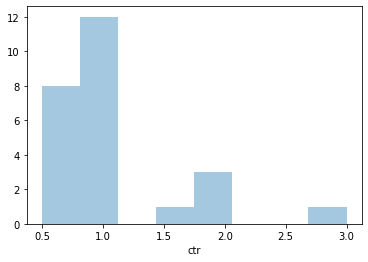

In [465]:
sns.distplot(ads_data1.ctr,kde=False)

In [466]:
#в логах есть баг, объявления приходят с кликами, но без показа
#сколько таких объявлений,если ли закономерности? Эта проблема наблюдается на всех платформах?

In [467]:
ads_data1 = ads_data1.fillna(0)

In [468]:
ads_data_bug = ads_data1.query('view==0').ad_id

In [469]:
ads_data[ads_data.ad_id.isin(ads_data_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id':'count'})

,platform,ad_id
0,android,1
1,ios,6
2,web,4


In [470]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id':'count'})
#баг на айосе не потому что это айос а потому что у него в принципе много объявлений

,platform,ad_id
0,android,22
1,ios,47
2,web,32


In [ ]:
# Есть ли различия в CTR у объявлений с видео и без? 
А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [505]:
df_2019_05_04 = ads_data[ads_data.date=='2019-05-04'].groupby(['ad_id','event'],as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id',columns='event', values='time').reset_index()

In [506]:
df_2019_05_04 ['ctr'] = df_2019_05_04.click/df_2019_05_04.view

In [507]:
df_2019_05_04 = df_2019_05_04.fillna(0)

In [511]:
#quantile - медиана, процентиль
df_2019_05_04[df_2019_05_04.click>0].ctr.quantile(q=0.95)

1.0